# Bike sharing challenge

### Author: Tristan Nel

### Date: February 2020

## Data Exploration

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA

In [2]:
# Raw data
station_data = pd.read_csv('station_data.csv')
trip_data = pd.read_csv('trip_data.csv')
weather_data = pd.read_csv('weather_data.csv')

In [3]:
def preview_raw_data(data_arr):
    for data in data_arr:
        display(data.head())
        display(data.info())

In [4]:
preview_raw_data([station_data, trip_data, weather_data])

,Id,Name,Lat,Long,Dock Count,City
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          76 non-null     int64  
 1   Name        76 non-null     object 
 2   Lat         76 non-null     float64
 3   Long        76 non-null     float64
 4   Dock Count  76 non-null     int64  
 5   City        76 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 3.7+ KB


None

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type
0,913460,31/08/2015 23:26,50,31/08/2015 23:39,70,Subscriber
1,913459,31/08/2015 23:11,31,31/08/2015 23:28,27,Subscriber
2,913455,31/08/2015 23:13,47,31/08/2015 23:18,64,Subscriber
3,913454,31/08/2015 23:10,10,31/08/2015 23:17,8,Subscriber
4,913453,31/08/2015 23:09,51,31/08/2015 23:22,60,Customer


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354152 entries, 0 to 354151
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Trip ID          354152 non-null  int64 
 1   Start Date       354152 non-null  object
 2   Start Station    354152 non-null  int64 
 3   End Date         354152 non-null  object
 4   End Station      354152 non-null  int64 
 5   Subscriber Type  354152 non-null  object
dtypes: int64(3), object(3)
memory usage: 16.2+ MB


None

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip
0,01/09/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,...,10.0,8.0,16.0,7.0,20.0,0.0,0.0,NaN,290.0,94107
1,02/09/2014,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,...,10.0,7.0,21.0,8.0,NaN,0.0,5.0,NaN,290.0,94107
2,03/09/2014,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,...,10.0,10.0,21.0,8.0,24.0,0.0,4.0,NaN,276.0,94107
3,04/09/2014,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,...,10.0,8.0,22.0,8.0,25.0,0.0,5.0,NaN,301.0,94107
4,05/09/2014,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,...,9.0,7.0,18.0,8.0,32.0,0.0,4.0,NaN,309.0,94107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1825 non-null   object 
 1   Max TemperatureF           1821 non-null   float64
 2   Mean TemperatureF          1821 non-null   float64
 3   Min TemperatureF           1821 non-null   float64
 4   Max Dew PointF             1775 non-null   float64
 5   MeanDew PointF             1775 non-null   float64
 6   Min DewpointF              1775 non-null   float64
 7   Max Humidity               1775 non-null   float64
 8   Mean Humidity              1775 non-null   float64
 9   Min Humidity               1775 non-null   float64
 10  Max Sea Level PressureIn   1824 non-null   float64
 11  Mean Sea Level PressureIn  1824 non-null   float64
 12  Min Sea Level PressureIn   1824 non-null   float64
 13  Max VisibilityMiles        1820 non-null   float

None

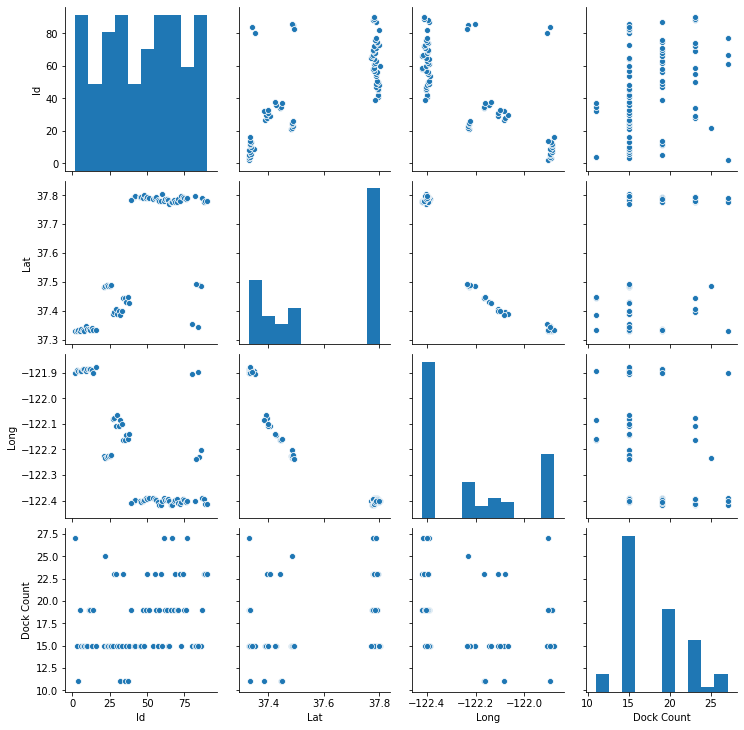

In [5]:
sns.pairplot(station_data)

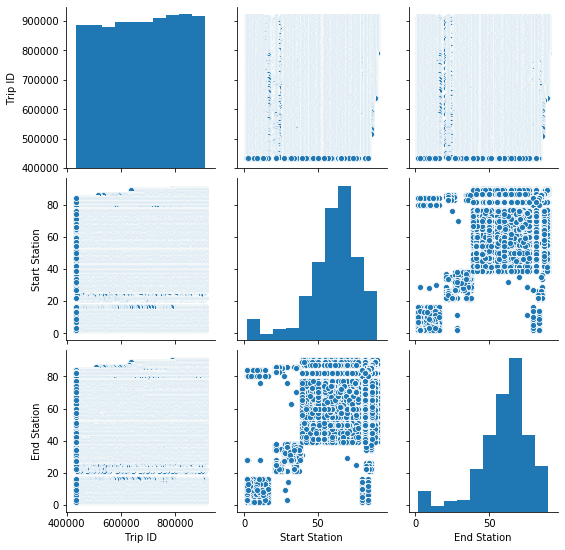

In [6]:
sns.pairplot(trip_data)

In [7]:
#sns.pairplot(weather_data)

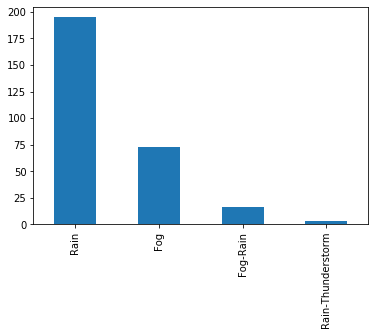

In [8]:
weather_data['Events'].value_counts().plot.bar()

The data was provided in three separate components, namely station-, trip- and weather-data, relationally linked by station IDs.

First, the data was pre-processed:

The station IDs in the station data were converted to strings, as they are categorical values, not numerical.

Next, the dates in the trip data were converted to timestamps so that additional data may be extracted, and the start and end stations were again converted to strings for the same reason as above.

Finally, the weather data dates were alrso converted to timestamps, with only the date (day,month,year) extracted, and the meteorological events (categorical data) were encoded with a one-hot encoding. The numerical zip codes were mapped to the associated city names to be used as an relational key for the station data

In [9]:
def get_preprocessed_datasets(station_data, trip_data, weather_data):
    pre_proc_station_data = station_data.copy()
    pre_proc_trip_data = trip_data.copy()
    pre_proc_weather_data = weather_data.copy()
    
    pre_proc_station_data['Id'] = pre_proc_station_data['Id'].astype(str)

    pre_proc_trip_data['Start Date'] = pd.to_datetime(pre_proc_trip_data['Start Date'])
    pre_proc_trip_data['End Date'] = pd.to_datetime(pre_proc_trip_data['End Date'])
    pre_proc_trip_data['Start Station'] = pre_proc_trip_data['Start Station'].astype(str)
    pre_proc_trip_data['End Station'] = pre_proc_trip_data['End Station'].astype(str)

    pre_proc_weather_data['Date'] = pd.to_datetime(pre_proc_weather_data['Date'])
    pre_proc_weather_data['Date'] = pre_proc_weather_data['Date'].apply(lambda x : x.date())
    pre_proc_weather_data = pd.get_dummies(pre_proc_weather_data, columns=['Events']) # Categorical

    def zip_to_city(zip_code):
      switcher = {
          94107: 'San Francisco',
          94063: 'Redwood City',
          94301: 'Palo Alto',
          94041: 'Mountain View',
          95113: 'San Jose'
      }
      return switcher.get(zip_code)
    pre_proc_weather_data['City'] = list((map(zip_to_city, pre_proc_weather_data['Zip'])))
    pre_proc_weather_data = pre_proc_weather_data.drop(['Zip'], axis=1)
    
    return pre_proc_station_data, pre_proc_trip_data, pre_proc_weather_data

In [10]:
#pre_proc_station_data, pre_proc_trip_data, pre_proc_weather_data = get_preprocessed_datasets(station_data, trip_data, weather_data)

Next, the labels/targets had to be generated. The challenge stated that the objective was to predict the net rate of bike renting for a given station at a given hour.

Therefore, from the given data, the difference between the number of trips ended and started at a station, for a given hour had to be calculated, for each station, for each hour between the dataset initial date and final date. 

The net rate hour would be designated by hourly start interval, ie. a net rate of 3 at 17:00 for station 2 means 3 bicycles were gained at the station between 17:00 - 18:00 at station 2.

In [11]:
def get_net_rate_matrix(pre_proc_station_data, pre_proc_trip_data, pre_proc_weather_data):
    # Number of trips ended per station per each timestamp hour
    end_indexed = pre_proc_trip_data.set_index('End Date')
    grouper = end_indexed.groupby([pd.Grouper(freq='1H'), 'End Station'])
    end_result = grouper['Trip ID'].count().unstack('End Station').fillna(0)

    # Number of trips started per station per timestamp hour
    start_indexed = pre_proc_trip_data.set_index('Start Date')
    grouper = start_indexed.groupby([pd.Grouper(freq='1H'), 'Start Station'])
    start_result = grouper['Trip ID'].count().unstack('Start Station').fillna(0)

    # Trips ended - Strips started = Net Rate
    net_rates_by_station = end_result - start_result
    net_rates_by_station.fillna(0, inplace=True)
    net_rates_by_station.index.name = 'Datetime'
    net_rates_by_station.columns.name = 'Station ID'

    return net_rates_by_station

In [12]:
#net_rates_by_station = get_net_rate_matrix(pre_proc_station_data, pre_proc_trip_data, pre_proc_weather_data)
#pickle.dump(net_rates_by_station, open('net_rates_by_station.sav', 'wb'))

In [13]:
net_rates_by_station = pickle.load(open('net_rates_by_station.sav', 'rb'))

In [14]:
net_rates_by_station.head()

Station ID,10,11,12,13,14,16,2,21,22,23,...,82,83,84,85,86,87,88,89,9,90
Datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-09 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-09 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-09 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-09 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-09 06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


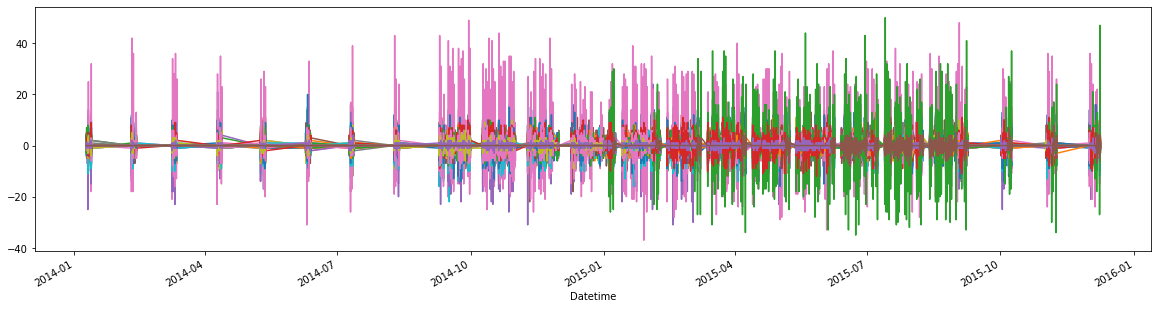

In [15]:
net_rates_by_station.plot(figsize=(20,5), legend=False)

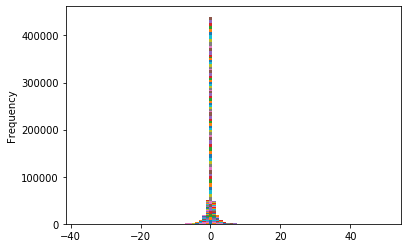

In [16]:
net_rates_by_station.plot.hist(stacked=True, bins=88, legend=False)

As can be seen from the plots, there is definitely a form periodic correlation between the net rate and the datetime.

In addition, the case of net rate = 0, and its neighboring values, present a major class imbalance in the data. This will need to be addressed, or the model will overfit on this 'class', and always predict zero, performing well on the training set and terribly on the testing set.

In the next step, the pre-processed data sources are combined using the station ID index to form one large dataset, where the net rate, geolocation and weather are recorded for each station, hour each hour interval of each date, on a separate row. The timestamps were separated into their components, and each component was represented as a sinusoid to allow the model to leverage the cyclic nature of time data.

(There is likely a better, vectorised approach for constructing the dataset, but since this is only built once, it will suffice for now)

In [17]:
# AUXILIARY FUNCTIONS

def check_station_id(pre_proc_station_data, station_ID):
    return station_ID in pre_proc_station_data['Id'].unique()

def get_net_rate(net_rates_by_station, datetime, station_ID):
    if check_station_id(pre_proc_station_data, station_ID):
        return [net_rates_by_station.loc[datetime][station_ID]]
    else: print('Station ID doesn\'t exist: %d' % station_ID)

def get_weather(pre_proc_weather_data, pre_proc_station_data, datetime, station_ID):
    if check_station_id(pre_proc_station_data, station_ID):
        station_city = pre_proc_station_data[pre_proc_station_data['Id'] == station_ID].iloc[0]['City']
        df = pre_proc_weather_data[(pre_proc_weather_data['Date'] == datetime.date()) & (pre_proc_weather_data['City'] == station_city)].drop(['Date'], axis=1)
        return df.values.tolist()[0]
    else: print('Station ID doesn\'t exist: %d' % station_ID)
        
def get_station(pre_proc_station_data, station_ID):
    if check_station_id(pre_proc_station_data, station_ID):
        df = pre_proc_station_data[pre_proc_station_data['Id'] == station_ID].drop(['Name','City'], axis=1)
        return df.values.tolist()[0]
    else: print('Station ID doesn\'t exist: %d' % station_ID)
        
def get_cyclic_datetime(datetime):
    days_in_month = datetime.days_in_month
    days_in_year = 366 if datetime.is_leap_year else 365
    
    year = str(datetime.year)
    month_sin = np.sin(2*np.pi*datetime.month/12)
    month_cos = np.cos(2*np.pi*datetime.month/12)
    day_sin = np.sin(2*np.pi*datetime.day/days_in_month)
    day_cos = np.cos(2*np.pi*datetime.day/days_in_month)
    day_of_week_sin = np.sin(2*np.pi*datetime.dayofweek/7)
    day_of_week_cos = np.cos(2*np.pi*datetime.dayofweek/7)
    day_of_year_sin = np.sin(2*np.pi*datetime.dayofyear/days_in_year)
    day_of_year_cos = np.cos(2*np.pi*datetime.dayofyear/days_in_year)
    hour_sin = np.sin(2*np.pi*datetime.hour/24)
    hour_cos = np.cos(2*np.pi*datetime.hour/24)
    return [
        year, 
        month_sin, 
        month_cos, 
        day_sin, 
        day_cos, 
        day_of_week_sin,
        day_of_week_cos,
        day_of_year_sin, 
        day_of_year_cos,
        hour_sin,
        hour_cos
    ]

def get_dataset_columns(pre_proc_station_data, pre_proc_weather_data):
    station_cols = list(pre_proc_station_data.drop(['Name','City'], axis=1).columns.values)
    net_rate_cols = ['Net Rate']
    time_cols = [
        'Year', 
        'Month (sine)',
        'Month (cosine)',
        'Day (sine)',
        'Day (cosine)',
        'Day of Week (sine)',
        'Day of Week (cosine)',
        'Day of Year (sine)',
        'Day of Year (cosine)',
        'Hour (sine)',
        'Hour (cosine)',
    ]
    weather_cols = list(pre_proc_weather_data.drop(['Date'], axis=1).columns.values)
    return station_cols + net_rate_cols + time_cols + weather_cols

# END OF AUXILIARY FUNCTIONS

# Dataset construction

# Generate a dataset row: for a station, for a particular hour-interval
def gen_dataset_row(pre_proc_station_data, pre_proc_weather_data, datetime, station_ID):
    station = get_station(pre_proc_station_data, station_ID)
    net_rate = get_net_rate(net_rates_by_station, datetime, station_ID)
    time = get_cyclic_datetime(datetime)
    weather = get_weather(pre_proc_weather_data, pre_proc_station_data, datetime, station_ID)
    
    return station + net_rate + time + weather

def gen_dataset(net_rates_by_station, pre_proc_station_data, pre_proc_weather_data):
    time_range = net_rates_by_station.index.tolist()
    station_IDs = pre_proc_station_data['Id'].unique()
    rows = []
    for station_ID in tqdm_notebook(station_IDs, desc='Station IDs'):
        for datetime in tqdm_notebook(time_range, desc='Hour intervals'):
            rows.append(gen_dataset_row(pre_proc_station_data, pre_proc_weather_data, datetime, station_ID))
    return pd.DataFrame(rows, columns=get_dataset_columns(pre_proc_station_data, pre_proc_weather_data))

In [18]:
#dataset = gen_dataset(net_rates_by_station, pre_proc_station_data, pre_proc_weather_data)
#dataset.to_csv('dataset.csv')

In [19]:
dataset = pd.read_csv('dataset.csv')

The generated index column, and the relational Id and City columns are dropped, as these are no longer needed, since they only served to relate other features to the trips.

For easy viewing, the Net Rate column is moved to the end of the dataframe.

In [20]:
dataset = dataset.dropna(axis=0)
dataset = dataset.drop([ 'Unnamed: 0', 'Id', 'City'], axis=1)
reordered_cols = list(dataset.columns).copy()
reordered_cols.remove('Net Rate')
reordered_cols.append('Net Rate')
dataset = dataset[reordered_cols]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527939 entries, 0 to 613547
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Lat                        527939 non-null  float64
 1   Long                       527939 non-null  float64
 2   Dock Count                 527939 non-null  int64  
 3   Year                       527939 non-null  int64  
 4   Month (sine)               527939 non-null  float64
 5   Month (cosine)             527939 non-null  float64
 6   Day (sine)                 527939 non-null  float64
 7   Day (cosine)               527939 non-null  float64
 8   Day of Week (sine)         527939 non-null  float64
 9   Day of Week (cosine)       527939 non-null  float64
 10  Day of Year (sine)         527939 non-null  float64
 11  Day of Year (cosine)       527939 non-null  float64
 12  Hour (sine)                527939 non-null  float64
 13  Hour (cosine)              52

In [21]:
dataset.describe()

,Lat,Long,Dock Count,Year,Month (sine),Month (cosine),Day (sine),Day (cosine),Day of Week (sine),Day of Week (cosine),...,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,Events_Fog,Events_Fog-Rain,Events_Rain,Events_Rain-Thunderstorm,Net Rate
count,527939.000000,527939.000000,527939.000000,527939.000000,5.279390e+05,5.279390e+05,5.279390e+05,527939.000000,527939.000000,527939.000000,...,527939.000000,527939.000000,527939.000000,527939.000000,527939.000000,527939.000000,527939.000000,527939.000000,527939.000000,527939.000000
mean,37.616802,-122.233588,18.133354,2014.665638,-1.627381e-02,-9.088526e-03,-7.418390e-03,-0.006421,0.002545,-0.000266,...,6.994335,22.175090,0.036833,3.710783,254.760986,0.062473,0.017288,0.124026,0.003472,-0.000078
std,0.205953,0.216950,3.912374,0.471768,7.094254e-01,7.045354e-01,7.112498e-01,0.702872,0.708699,0.705508,...,3.245935,6.429518,0.215828,2.276654,77.898414,0.242013,0.130342,0.329611,0.058821,1.760382
min,37.329732,-122.418954,11.000000,2014.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000,-0.974928,-0.900969,...,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.000000
25%,37.385956,-122.402717,15.000000,2014.000000,-8.660254e-01,-8.660254e-01,-7.247928e-01,-0.758758,-0.781831,-0.900969,...,5.000000,18.000000,0.000000,2.000000,244.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.776619,-122.392738,19.000000,2015.000000,-2.449294e-16,-1.836970e-16,-2.449294e-16,-0.050649,0.000000,-0.222521,...,7.000000,22.000000,0.000000,4.000000,279.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.789625,-122.066553,19.000000,2015.000000,5.000000e-01,5.000000e-01,7.247928e-01,0.688967,0.781831,0.623490,...,9.000000,25.000000,0.000000,6.000000,302.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,37.804770,-121.877349,27.000000,2015.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.974928,1.000000,...,23.000000,62.000000,3.360000,8.000000,360.000000,1.000000,1.000000,1.000000,1.000000,50.000000


Half a million examples seems like many, but the vast majority of the net rate values fall within one standard deviation (1.76) of the mean (0), while the minimum and maximum values of the net rate are -37 and 50 respectively. This indicates a heavy class imbalance, or otherwise outliers.

As can be seen in the following correlation matrix, likely due to the class imbalance, there doesn't appear to be any linear correlation between the features and the net rate

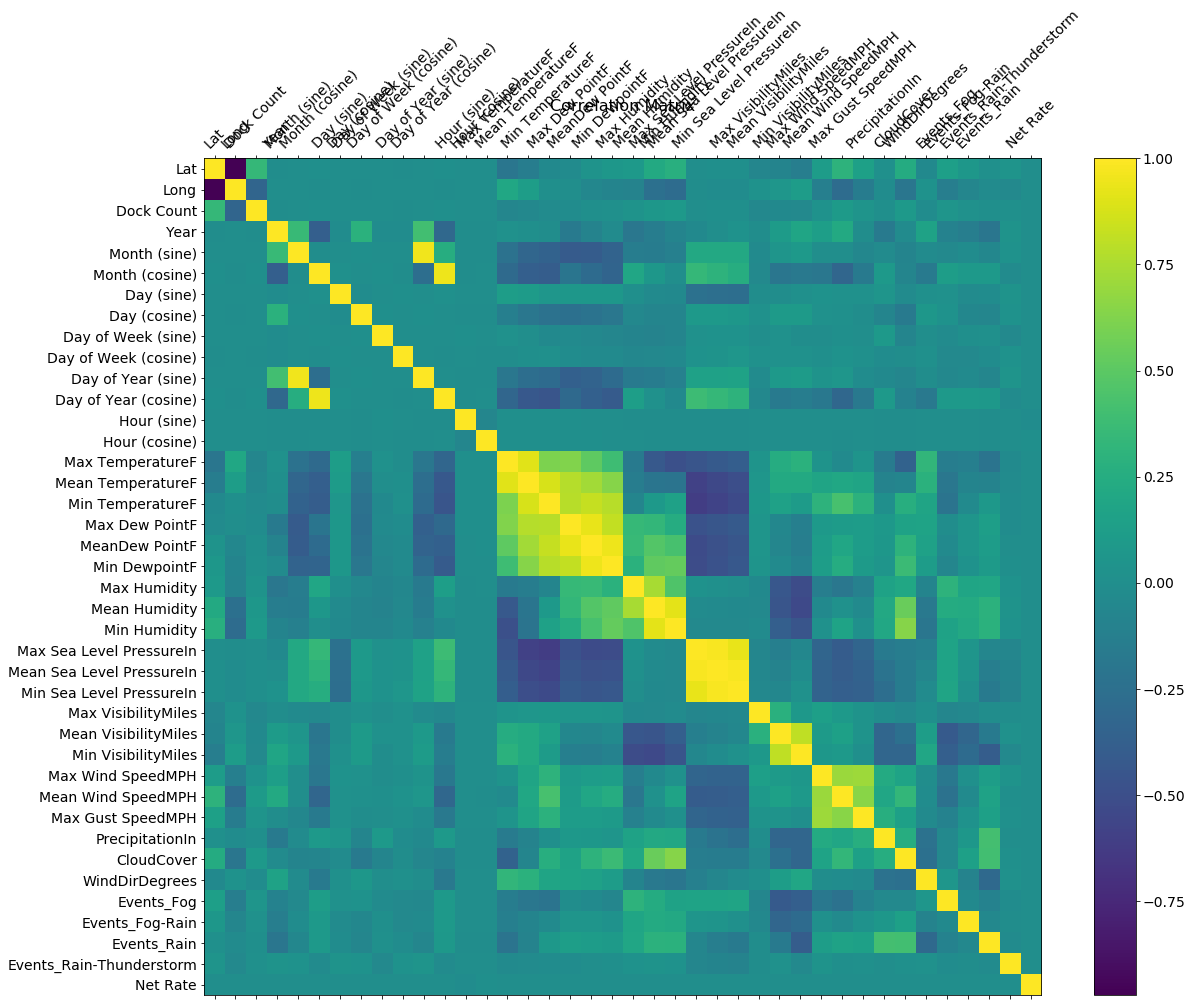

In [22]:
f = plt.figure(figsize=(19, 15))
plt.matshow(dataset.corr(), fignum=f.number)
plt.xticks(range(dataset.shape[1]), dataset.columns, fontsize=14, rotation=45)
plt.yticks(range(dataset.shape[1]), dataset.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Therefore it was attempted to reduce the class distribution to something close to a normal distribution shape. By trial and error, all occurences of net rate between -18 and 19 were reduced to 50 samples each.

In [23]:
def get_balanced_dataset(dataset, class_sample_limit, undersample_class_range):
    under_sample_dfs = []
    for i in undersample_class_range:
        under_sample_dfs.append(dataset[dataset['Net Rate'] == i].sample(class_sample_limit, replace=True))
    not_undersampled = [dataset[~dataset['Net Rate'].isin(undersample_class_range)]]
    combined = not_undersampled + (under_sample_dfs) # append arrays of dfs
    balanced_dataset = pd.concat(combined, axis=0)
    return balanced_dataset

In [24]:
balanced_dataset = get_balanced_dataset(dataset, 50, list(range(-18,19)))

This does, however, limit the dataset to two and a half thousand examples

In [25]:
print(balanced_dataset.shape)

(2455, 40)


The resulting data has a mean of 2.81 and a standard deviation of 15.44

In [26]:
balanced_dataset.describe()

,Lat,Long,Dock Count,Year,Month (sine),Month (cosine),Day (sine),Day (cosine),Day of Week (sine),Day of Week (cosine),...,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,Events_Fog,Events_Fog-Rain,Events_Rain,Events_Rain-Thunderstorm,Net Rate
count,2455.000000,2455.000000,2455.000000,2455.000000,2.455000e+03,2.455000e+03,2.455000e+03,2455.000000,2455.000000,2455.000000,...,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000
mean,37.768246,-122.382944,20.011813,2014.695723,-1.808919e-02,-6.354561e-02,2.044269e-02,-0.024634,0.200325,0.002695,...,7.919348,22.659878,0.020123,4.134012,256.557637,0.087984,0.015071,0.112831,0.003259,2.811813
std,0.077493,0.078383,3.391265,0.460194,7.275425e-01,6.831708e-01,7.205240e-01,0.692984,0.634699,0.746599,...,3.378104,6.551501,0.115018,2.154099,63.082221,0.283329,0.121861,0.316451,0.057003,15.440860
min,37.329732,-122.418954,11.000000,2014.000000,-1.000000e+00,-1.000000e+00,-9.987165e-01,-1.000000,-0.974928,-0.900969,...,1.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-37.000000
25%,37.776600,-122.398108,19.000000,2014.000000,-8.660254e-01,-8.660254e-01,-7.247928e-01,-0.669131,-0.433884,-0.900969,...,5.000000,20.000000,0.000000,2.000000,250.000000,0.000000,0.000000,0.000000,0.000000,-10.000000
50%,37.776617,-122.395260,19.000000,2015.000000,-2.449294e-16,-1.836970e-16,1.224647e-16,-0.050649,0.433884,-0.222521,...,8.000000,23.000000,0.000000,4.000000,271.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,37.790302,-122.394643,23.000000,2015.000000,8.660254e-01,5.000000e-01,7.818315e-01,0.669131,0.781831,0.623490,...,10.000000,25.000000,0.000000,6.000000,293.000000,0.000000,0.000000,0.000000,0.000000,15.000000
max,37.804770,-121.877349,27.000000,2015.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.974928,1.000000,...,22.000000,62.000000,1.430000,8.000000,360.000000,1.000000,1.000000,1.000000,1.000000,50.000000


The data now has a much more balanced profile

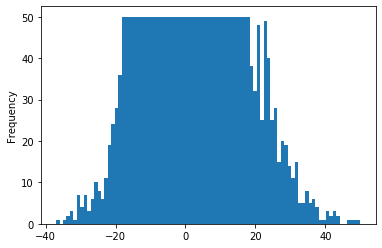

In [27]:
balanced_dataset['Net Rate'].plot.hist(bins=88)

Replotting the correlation matrix for the balanced dataset reveals a strong linear correlation to the sinusoids of the Hour feature - as initially hypothesised by the periodic nature of the net rate data. There may be further non-linear features of importance

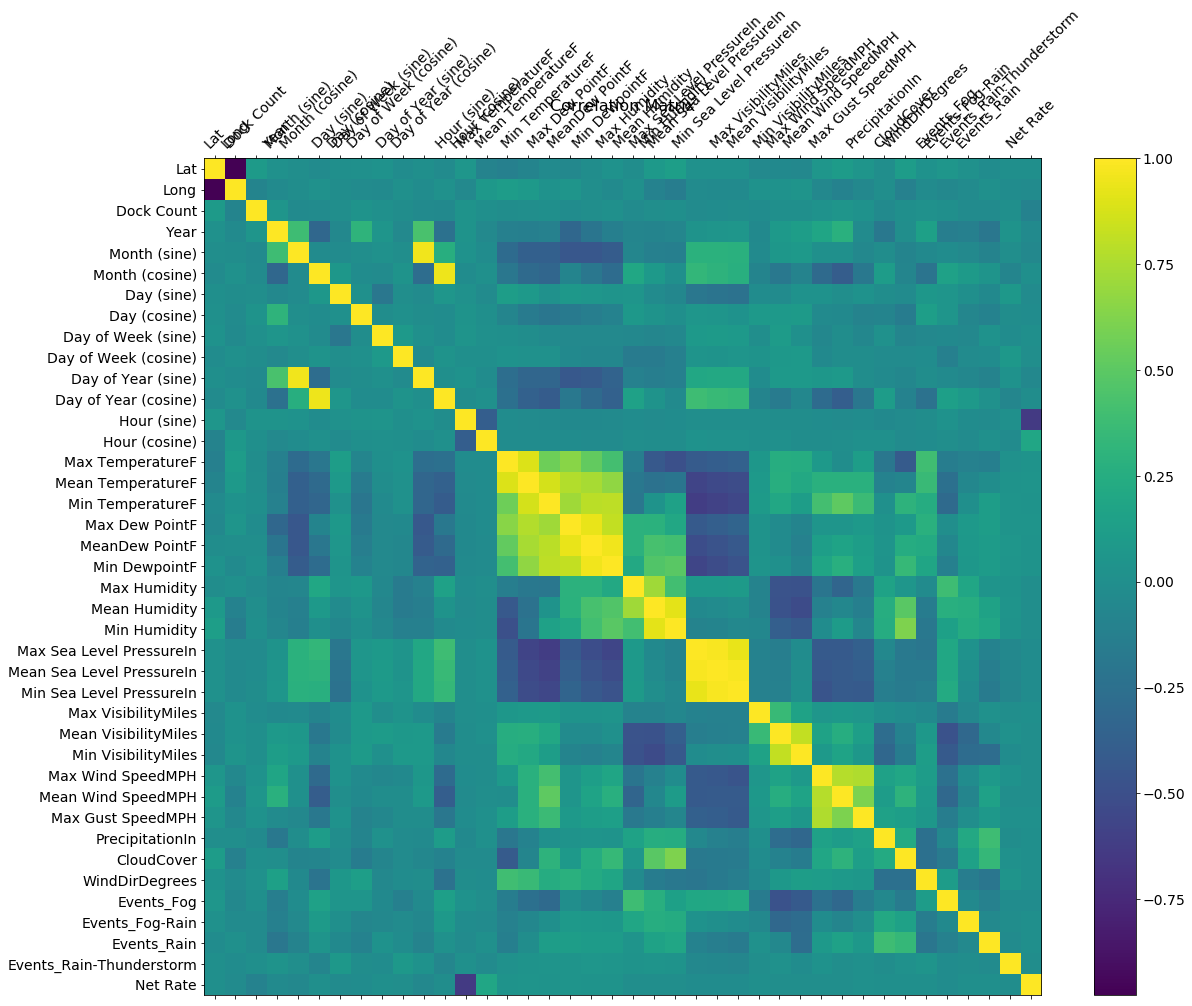

In [28]:
f = plt.figure(figsize=(19, 15))
plt.matshow(balanced_dataset.corr(), fignum=f.number)
plt.xticks(range(dataset.shape[1]), dataset.columns, fontsize=14, rotation=45)
plt.yticks(range(dataset.shape[1]), dataset.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Modelling Approach

The inital goal was to identify features that contribute linearly or non-linearly to the target. After some research, I elected to use a Random Forest Regressor model to attempt to identify important features, and as a side benefit, possibly train a viable model.

The datasets were split by a standard 3:1 ratio (train:test) and the input data was scaled using a Standard Scaler.

In [29]:
cols = list(balanced_dataset.columns)
feature_cols = cols.copy()
feature_cols.remove('Net Rate')
target_col = 'Net Rate'

In [30]:
def get_X_y_sets(dataset):
    X = dataset.drop(['Net Rate'], axis=1)
    y = dataset['Net Rate']
    # Default train:test ratio of 3:1
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    # Normalise
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

def get_RFR_model(N, num_CPUs=4):
    rf = RandomForestRegressor(
        n_estimators = N,
        bootstrap = True,
        oob_score = True,
        random_state = 42, # The answer to the Universe, Life, and Everything
        n_jobs = num_CPUs
    )
    return rf

def get_RFR_scores(rf, X_train_scaled, X_test_scaled, y_train, y_test):
    R2_val = rf.score(X_train_scaled, y_train)
    OOB = rf.oob_score_
    R2_test = rf.score(X_test_scaled, y_test)
    return R2_val, OOB, R2_test

In [31]:
X_train_scaled, X_test_scaled, y_train, y_test = get_X_y_sets(balanced_dataset)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(1841, 39)
(614, 39)


The optimal number of estimators for the Random Forest Regressor had to be determined, and was determined by an incremental loop

In [32]:
results = []

est_list = list(range(10,210,10))

for n in est_list:
    rf = get_RFR_model(n)
    rf.fit(X_train_scaled, y_train)
    R2_val, OOB, R2_test = get_RFR_scores(rf, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append([R2_val, OOB, R2_test])

/home/tristan/.local/share/virtualenvs/codility-ml-test-tR3UURAZ/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/tristan/.local/share/virtualenvs/codility-ml-test-tR3UURAZ/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


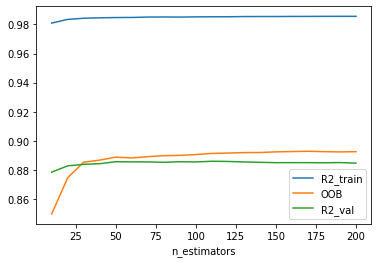

In [33]:
results_df = pd.DataFrame(results, columns=['R2_train', 'OOB', 'R2_val'], index=est_list)
results_df.index.name = 'n_estimators'
results_df.plot()

The model scores appear to even out at about 125 estimators for the Random Forest Regressors.

The feature importances could now be extracted and visualised:

In [39]:
rf = get_RFR_model(125)
rf.fit(X_train_scaled, y_train)
print('R2_train\tOOB\t\tR2_test\n%f\t%f\t%f' % get_RFR_scores(rf, X_train_scaled, X_test_scaled, y_train, y_test))

R2_train	OOB		R2_test
0.985266	0.891908	0.885872


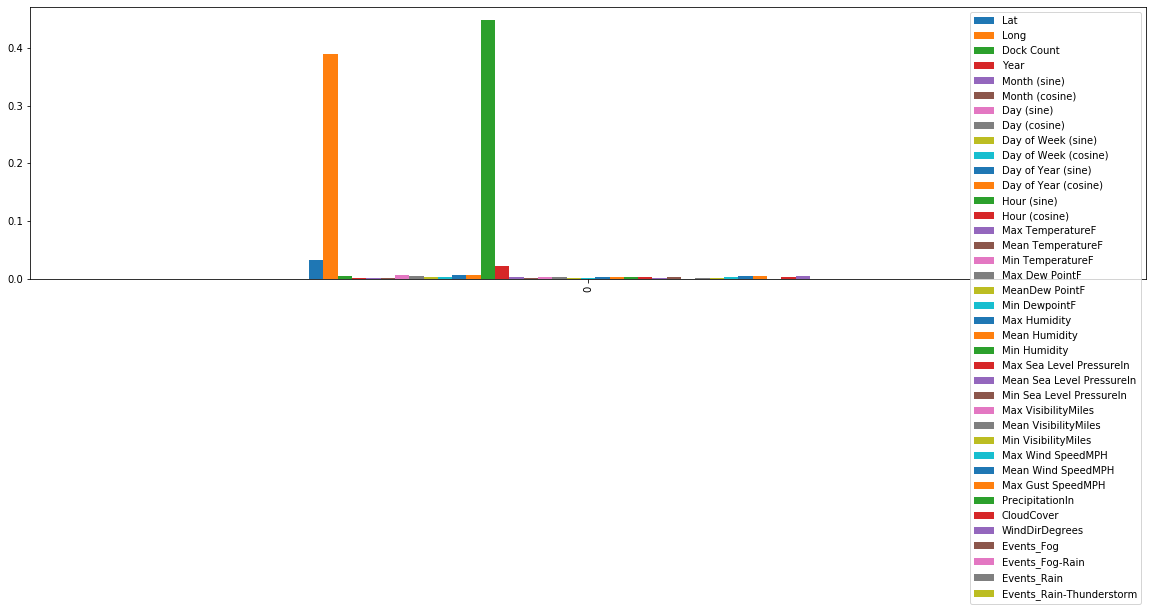

In [40]:
f_imps = pd.DataFrame([rf.feature_importances_], columns=feature_cols)
f_imps.plot.bar(figsize=(20,5))

The Random Forest Regressor appears to suggest that the Hour (sine), Longitude, Latitude, Hour (cosine) and Dock Count , in that order, are the most important features for the prediction. 

The time aspect certainly makes sense - the time of day is the most likely to have an influence on whether there will be a high rental rate of bikes.

The geolocation aspect may reflect a higher popularity of the bike rental service in certain cities, or simply a skewed distribution of stations between cities.

I find it surprising that the weather features do not seem to contribute heavily to the prediction - this may be due to the model, or perhaps the weather is not varied enough over the Bay Area to elicit a strong relation to the target.

The Random Forest Regressor can now be retrained with the most important features:

In [45]:
feature_cols_r = ['Hour (sine)', 'Long', 'Lat', 'Hour (cosine)', 'Dock Count']

In [46]:
def get_X_y_sets_reduced(dataset):
    X = dataset[feature_cols_r]
    y = dataset['Net Rate']
    # Default train:test ratio of 3:1
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    # Normalise
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

In [47]:
X_train_scaled_r, X_test_scaled_r, y_train, y_test = get_X_y_sets_reduced(balanced_dataset)

In [48]:
rf = get_RFR_model(125)
rf.fit(X_train_scaled_r, y_train)
print('R2_train\tOOB\t\tR2_test\n%f\t%f\t%f' % get_RFR_scores(rf, X_train_scaled_r, X_test_scaled_r, y_train, y_test))

R2_train	OOB		R2_test
0.905827	0.885987	0.895627


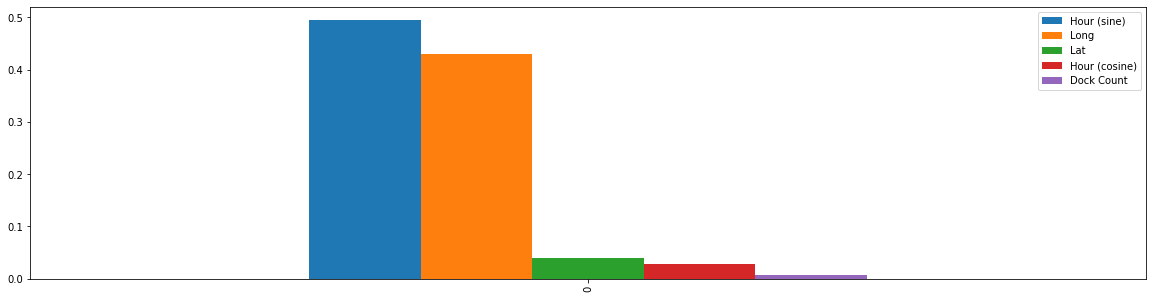

In [50]:
f_imps = pd.DataFrame([rf.feature_importances_], columns=feature_cols_r)
f_imps.plot.bar(figsize=(20,5))

The OOB and testing scores appear to hold with the 5 selected features

## Model Performance

For a broad view of model performance, the Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) metrics were used.

The MAE would give an average of by how much the prediction was missing the mark, but MAE may not adequately reflect the performance with regards to large error values, and may be a misrepresentation due to positive and negative values of Net Rate.

The MSE would penalize large errors, and is used to calculate the RMSE. The closer MSE is to 0, the better the model is performing overall, and it can be used to compare two models.

The RMSE gives the square root of the MSE, which is easier to compare to the actual Net Rate value scale directly. 

These errors would need to be taken in the context of the distribution and range of the Net Rate values. Also, the dataset distrubution was modified to train the model, and it would need to be confirmed that the model accuracy holds for the original distribution of values.

In [66]:
def get_accuracy_scores(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

def get_RFR_accuracy(rf, X, y):
    y_pred = rf.predict(X)
    return get_accuracy_scores(y, y_pred)

For reference, we establish a simple baseline model: assuming that all predictions equal the mean of the Net Rate.

Using the balanced dataset:

In [113]:
avg_net_rate = np.mean(balanced_dataset['Net Rate'])
print('avg: %f' % avg_net_rate)

y_pred_train_baseline = [avg_net_rate] * len(y_train)
y_pred_test_baseline = [avg_net_rate] * len(y_test)

print('BASELINE')
print('MAE\t\tMSE\t\tRMSE\n%f\t%f\t%f' % get_accuracy_scores(y_train, y_pred_train_baseline))
print('MAE\t\tMSE\t\tRMSE\n%f\t%f\t%f' % get_accuracy_scores(y_test, y_pred_test_baseline))

avg: 2.811813
BASELINE
MAE		MSE		RMSE
12.976611	237.136140	15.399225
MAE		MSE		RMSE
12.980859	241.881797	15.552550


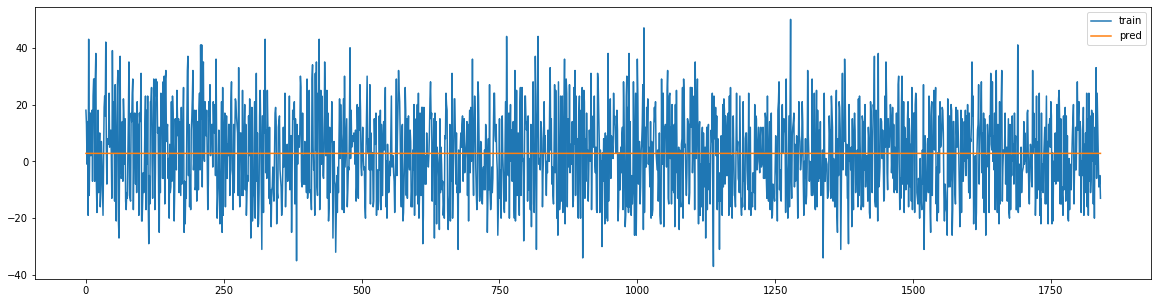

In [114]:
df = pd.DataFrame()
df['train'] = y_train
df['pred'] = y_pred_train_baseline
df = df.reset_index(drop=True)
df.plot(figsize=(20,5))

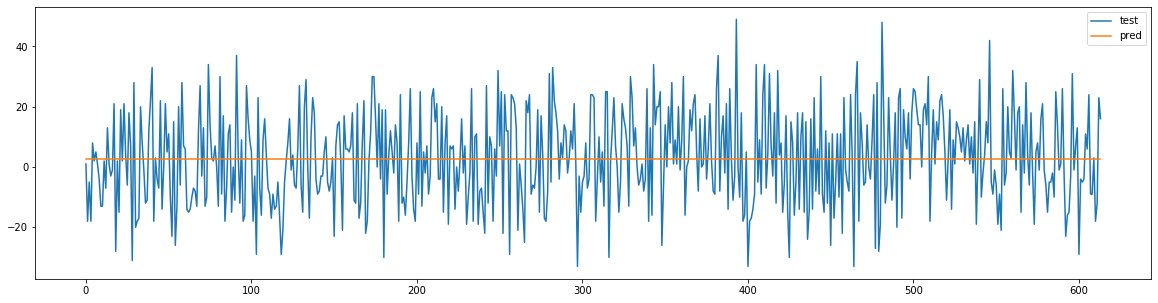

In [115]:
df = pd.DataFrame()
df['test'] = y_test
df['pred'] = y_pred_test_baseline
df = df.reset_index(drop=True)
df.plot(figsize=(20,5))

Pretty terrible - the MAE is almost equivalent to the standard devation.

Now, we evaluate the Random Forest on the same data:

In [118]:
print('TRAINING DATA')
print('MAE\t\tMSE\t\tRMSE\n%f\t%f\t%f' % get_RFR_accuracy(rf, X_train_scaled_r, y_train))
print('TESTING DATA')
print('MAE\t\tMSE\t\tRMSE\n%f\t%f\t%f' % get_RFR_accuracy(rf, X_test_scaled_r, y_test))

TRAINING DATA
MAE		MSE		RMSE
3.270947	22.331084	4.725578
TESTING DATA
MAE		MSE		RMSE
3.732014	25.239436	5.023887


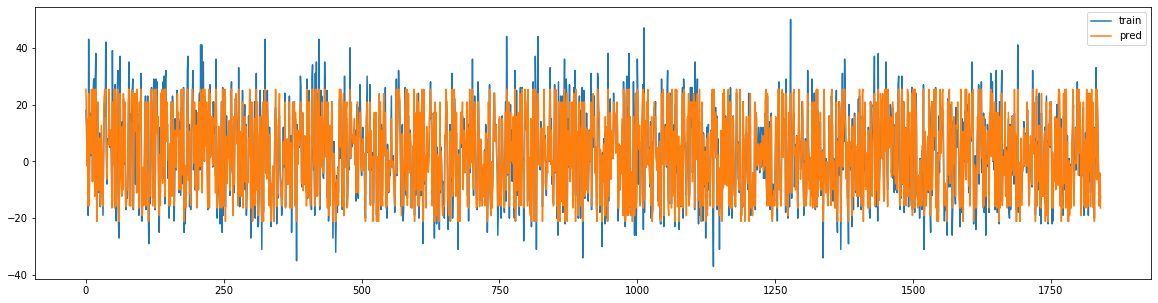

In [119]:
df = pd.DataFrame()
df['train'] = y_train
df['pred'] = rf.predict(X_train_scaled_r)
df = df.reset_index(drop=True)
df.plot(figsize=(20,5))

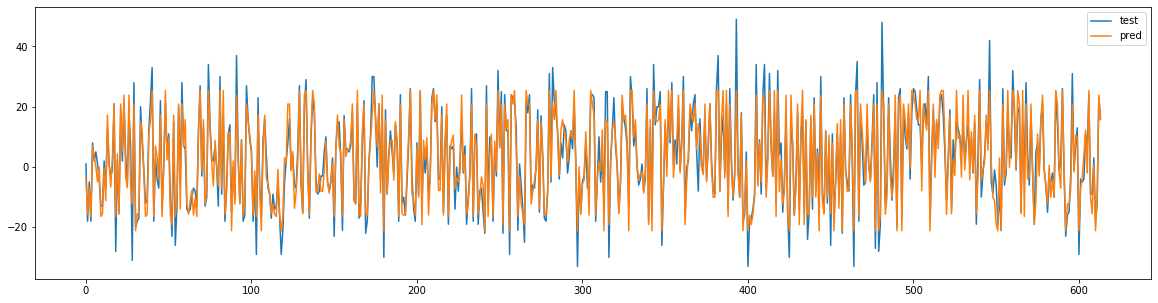

In [120]:
df = pd.DataFrame()
df['test'] = y_test
df['pred'] = rf.predict(X_test_scaled_r)
df = df.reset_index(drop=True)
df.plot(figsize=(20,5))

## Potential Improvements

## Conclusions